# **Small cap stocks (US stocks) analysis**
- This notebook is for analyzing small cap stocks (US stocks)  for the stratigies called Gap-Up(>15%) Shorts.
- data is from 2020-2021.
- ### **disclaimer: This notebook is for educational purposes only. It is not for investment purposes.**

In [450]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings as warnings
warnings.filterwarnings("ignore")

In [451]:
df = pd.read_csv('smallCapDataset.csv')

In [452]:
df.head()

,date,open,gap,hod,low,close,eodVolume,pmVolume,floatShares,marketCap,hodTime,lodTime,openPush,hodToClose,closedRed
0,6/1/2020,$3.50,42.28%,$5.94,$3.35,$3.95,"75,000,000","2,154,000","10,000,000","$35,000,000",9:57:00 AM,4:00:00 PM,69.71%,-33.50%,no
1,6/1/2020,$2.28,103.57%,$2.79,$1.83,$1.99,"11,410,000","8,880,000","22,970,000","$52,371,600",10:23:00 AM,3:00:00 PM,22.37%,-28.67%,yes
2,6/1/2020,$2.54,164.58%,$3.18,$2.08,$2.61,"200,000,000","15,578,000","14,890,000","$37,820,600",12:19:00 PM,10:00:00 AM,25.20%,-17.92%,no
3,6/2/2020,$2.35,62.07%,$2.68,$1.60,$1.64,"45,000,000","8,545,000","9,850,000","$23,147,500",9:52:00 AM,3:54:00 PM,14.04%,-38.81%,yes
4,6/2/2020,$4.28,112.94%,$4.28,$2.30,$2.36,"22,000,000","3,578,000","7,560,000","$32,356,800",9:30:00 AM,4:00:00 PM,0.00%,-44.86%,yes


## **Cleaning the data**

In [453]:
df.isna().sum()

date           0
open           0
gap            0
hod            0
low            0
close          1
eodVolume      0
pmVolume       0
floatShares    0
marketCap      0
hodTime        0
lodTime        0
openPush       0
hodToClose     0
closedRed      0
dtype: int64

In [454]:
df.dropna(inplace=True)

In [455]:
df.isna().any().sum()

0

In [456]:
df.dropna(inplace=True)

In [457]:
#final check for missing values
df.isna().sum().any()

False

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 920
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         920 non-null    object
 1   open         920 non-null    object
 2   gap          920 non-null    object
 3   hod          920 non-null    object
 4   low          920 non-null    object
 5   close        920 non-null    object
 6   eodVolume    920 non-null    object
 7   pmVolume     920 non-null    object
 8   floatShares  920 non-null    object
 9   marketCap    920 non-null    object
 10  hodTime      920 non-null    object
 11  lodTime      920 non-null    object
 12  openPush     920 non-null    object
 13  hodToClose   920 non-null    object
 14  closedRed    920 non-null    object
dtypes: object(15)
memory usage: 115.0+ KB


In [459]:
# drop date column
df = df.drop(['date','lodTime'], axis=1)
df.head()

,open,gap,hod,low,close,eodVolume,pmVolume,floatShares,marketCap,hodTime,openPush,hodToClose,closedRed
0,$3.50,42.28%,$5.94,$3.35,$3.95,"75,000,000","2,154,000","10,000,000","$35,000,000",9:57:00 AM,69.71%,-33.50%,no
1,$2.28,103.57%,$2.79,$1.83,$1.99,"11,410,000","8,880,000","22,970,000","$52,371,600",10:23:00 AM,22.37%,-28.67%,yes
2,$2.54,164.58%,$3.18,$2.08,$2.61,"200,000,000","15,578,000","14,890,000","$37,820,600",12:19:00 PM,25.20%,-17.92%,no
3,$2.35,62.07%,$2.68,$1.60,$1.64,"45,000,000","8,545,000","9,850,000","$23,147,500",9:52:00 AM,14.04%,-38.81%,yes
4,$4.28,112.94%,$4.28,$2.30,$2.36,"22,000,000","3,578,000","7,560,000","$32,356,800",9:30:00 AM,0.00%,-44.86%,yes


In [460]:
df.columns

Index(['open', 'gap', 'hod', 'low', 'close', 'eodVolume', 'pmVolume',
       'floatShares', 'marketCap', 'hodTime', 'openPush', 'hodToClose',
       'closedRed'],
      dtype='object')

In [461]:
# Convert object columns to float
for column in ['open', 'gap', 'hod', 'low', 'close', 'eodVolume', 'pmVolume',
       'floatShares', 'marketCap', 'openPush',
       'hodToClose']:
    df[column] = df[column].str.replace('[$,%]', '').astype(float)

df.head()

,open,gap,hod,low,close,eodVolume,pmVolume,floatShares,marketCap,hodTime,openPush,hodToClose,closedRed
0,3.50,42.28,5.94,3.35,3.95,75000000.0,2154000.0,10000000.0,35000000.0,9:57:00 AM,69.71,-33.50,no
1,2.28,103.57,2.79,1.83,1.99,11410000.0,8880000.0,22970000.0,52371600.0,10:23:00 AM,22.37,-28.67,yes
2,2.54,164.58,3.18,2.08,2.61,200000000.0,15578000.0,14890000.0,37820600.0,12:19:00 PM,25.20,-17.92,no
3,2.35,62.07,2.68,1.60,1.64,45000000.0,8545000.0,9850000.0,23147500.0,9:52:00 AM,14.04,-38.81,yes
4,4.28,112.94,4.28,2.30,2.36,22000000.0,3578000.0,7560000.0,32356800.0,9:30:00 AM,0.00,-44.86,yes


In [462]:
df['hodTime'] = pd.to_datetime(df['hodTime'], format='%I:%M:%S %p').dt.strftime('%H%M').astype(int)

In [463]:
df[df['hodTime']>1600].dropna(axis=0,inplace=True)

In [464]:
#convert 'ClosedRed' to binary
df['closedRed']=df['closedRed'].map({'yes': 1, 'no': 0})
df.head()

,open,gap,hod,low,close,eodVolume,pmVolume,floatShares,marketCap,hodTime,openPush,hodToClose,closedRed
0,3.50,42.28,5.94,3.35,3.95,75000000.0,2154000.0,10000000.0,35000000.0,957,69.71,-33.50,0
1,2.28,103.57,2.79,1.83,1.99,11410000.0,8880000.0,22970000.0,52371600.0,1023,22.37,-28.67,1
2,2.54,164.58,3.18,2.08,2.61,200000000.0,15578000.0,14890000.0,37820600.0,1219,25.20,-17.92,0
3,2.35,62.07,2.68,1.60,1.64,45000000.0,8545000.0,9850000.0,23147500.0,952,14.04,-38.81,1
4,4.28,112.94,4.28,2.30,2.36,22000000.0,3578000.0,7560000.0,32356800.0,930,0.00,-44.86,1


In [465]:
# fitler only gap above 15% and open price below $25
df = df[(df.gap > 15) & (df.gap < 100) & (df.open < 25)]


In [466]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,626.0,4.455399e+00,3.573641e+00,0.60,2.082500e+00,3.155000e+00,5.700000e+00,2.250000e+01
gap,626.0,4.343371e+01,2.264263e+01,15.05,2.350000e+01,3.784500e+01,5.929500e+01,9.875000e+01
hod,626.0,5.604776e+00,4.957035e+00,0.69,2.450000e+00,3.905000e+00,7.215000e+00,3.882000e+01
low,626.0,3.617396e+00,2.895314e+00,0.45,1.682500e+00,2.605000e+00,4.825000e+00,1.953000e+01
close,626.0,4.206917e+00,3.605489e+00,0.48,1.872500e+00,2.910000e+00,5.382500e+00,3.110000e+01
eodVolume,626.0,6.365698e+07,8.533779e+07,23770.00,1.475350e+07,3.200000e+07,8.392200e+07,9.911060e+08
pmVolume,626.0,7.309896e+06,7.445582e+06,100000.00,2.413750e+06,4.705000e+06,9.405148e+06,4.700000e+07
floatShares,626.0,2.206937e+07,3.457920e+07,770000.00,4.977500e+06,1.143000e+07,2.550500e+07,4.250000e+08
marketCap,626.0,7.874075e+07,1.353016e+08,1424100.00,1.750450e+07,3.771035e+07,7.908700e+07,1.534500e+09
hodTime,626.0,1.018081e+03,1.626014e+02,0.00,9.320000e+02,9.430000e+02,1.025750e+03,1.601000e+03


## EDA

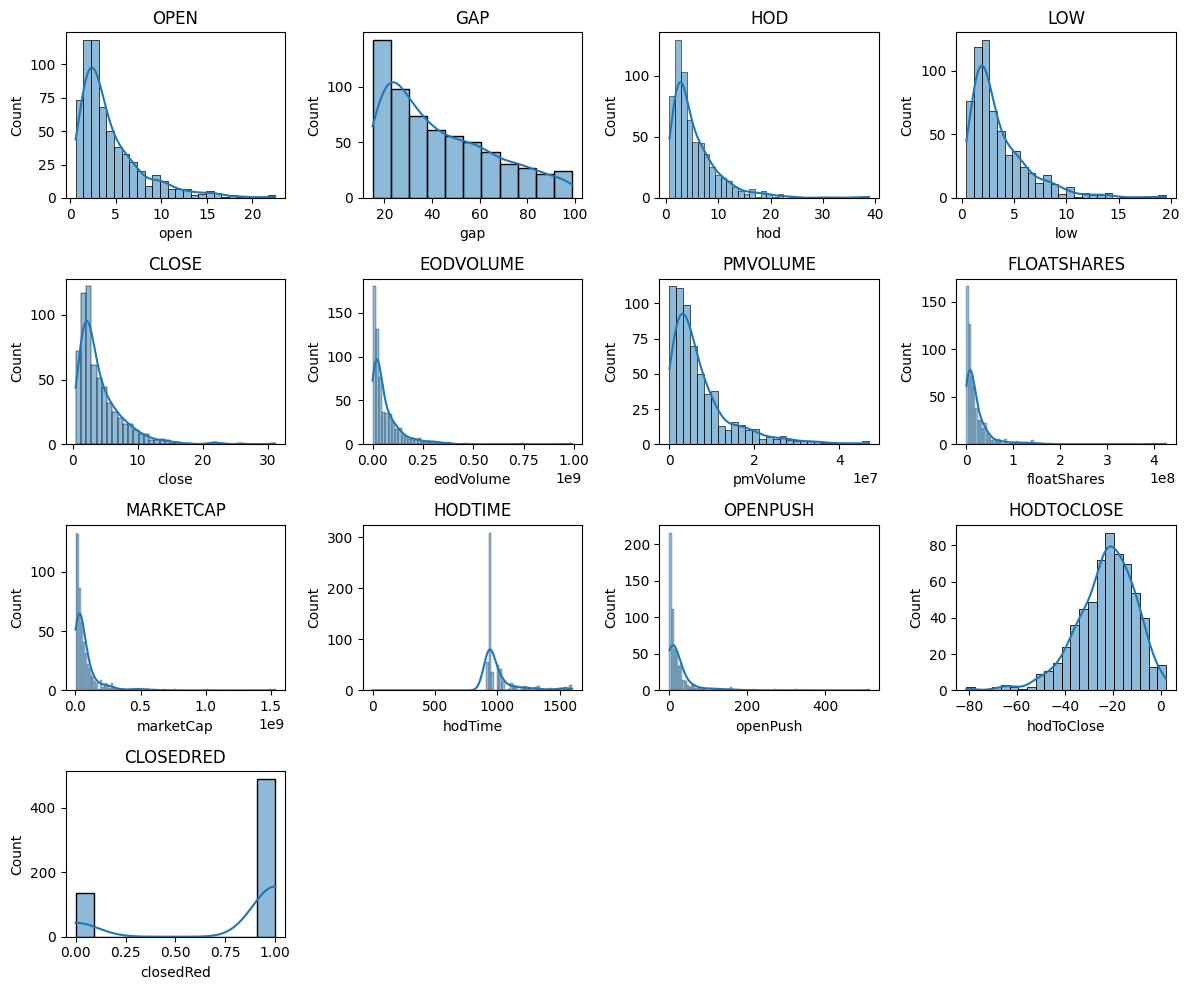

In [467]:
plt.figure(figsize=(12,10))

for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col.upper())

plt.tight_layout()
plt.show()

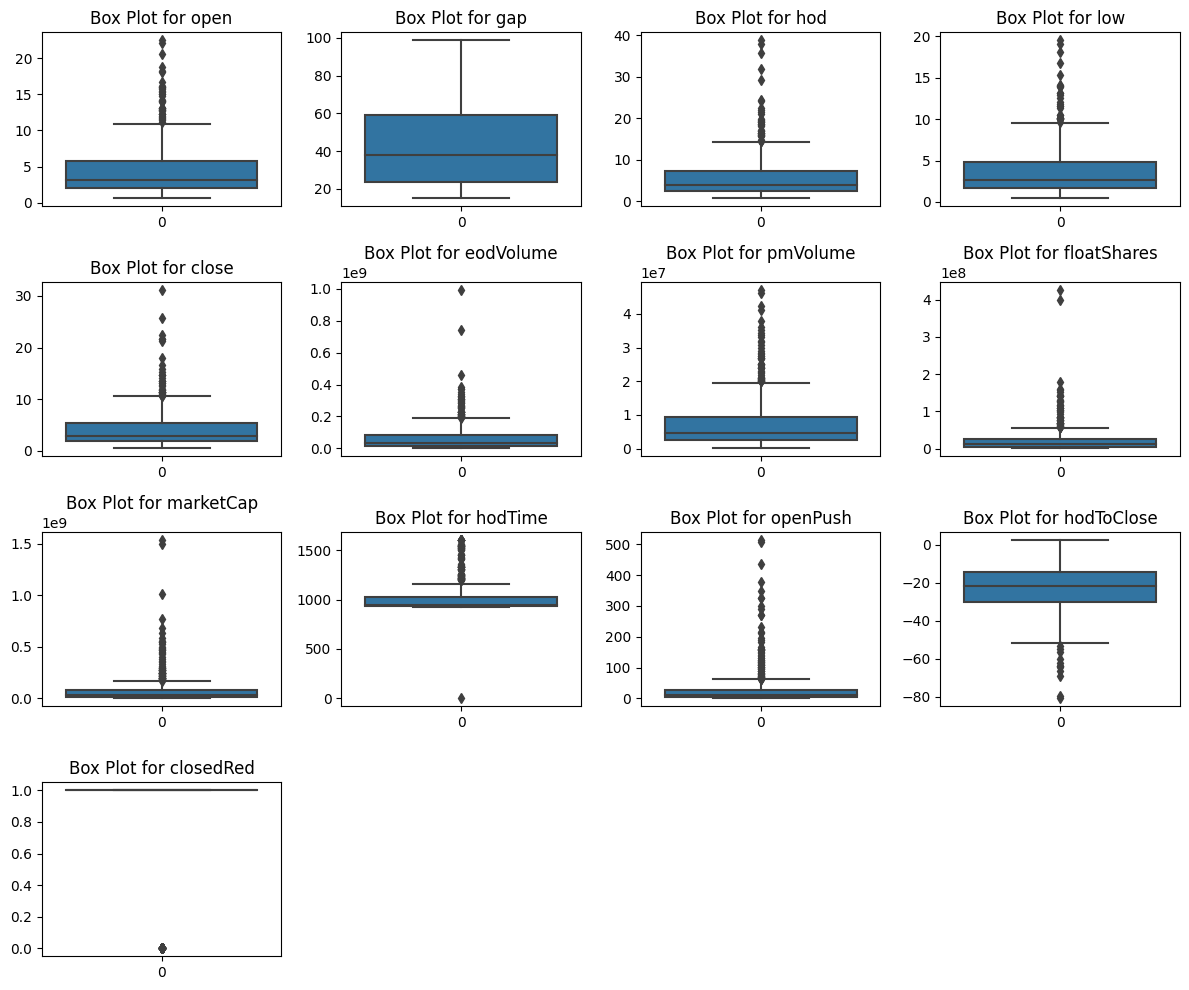

In [468]:
plt.figure(figsize=(12,10))

for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[col])
    plt.title('Box Plot for ' + col)

plt.tight_layout()
plt.show()

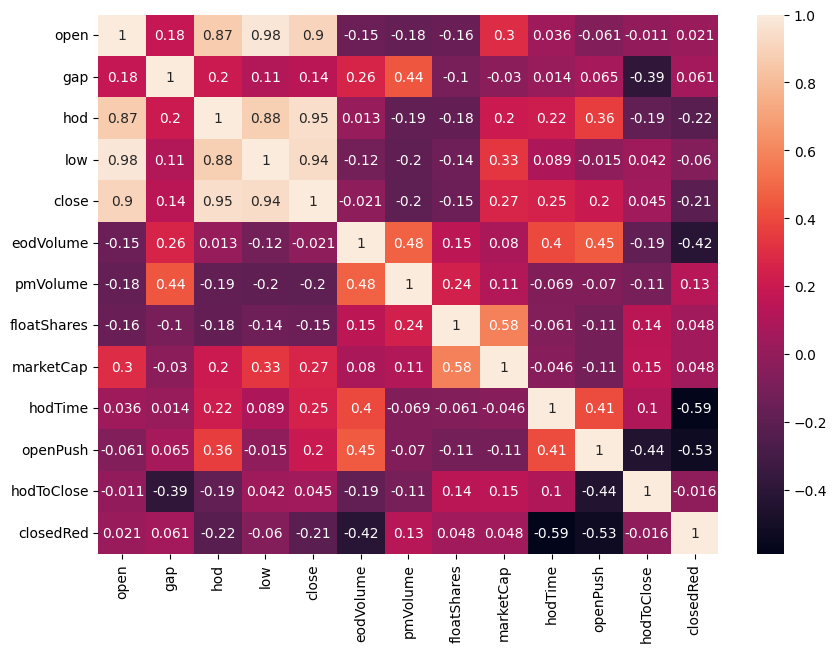

In [469]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True);

## **Modelling** 

In [470]:
# drop hod time since its in int format. it is not needed
df.drop(['hod','low','close','hodTime'], axis=1, inplace=True)
df.head()

,open,gap,eodVolume,pmVolume,floatShares,marketCap,openPush,hodToClose,closedRed
0,3.50,42.28,75000000.0,2154000.0,10000000.0,35000000.0,69.71,-33.50,0
3,2.35,62.07,45000000.0,8545000.0,9850000.0,23147500.0,14.04,-38.81,1
6,3.45,48.07,24000000.0,4710000.0,6670000.0,23011500.0,11.59,-25.71,1
7,4.27,97.69,27000000.0,3504000.0,21330000.0,91079100.0,9.13,-29.18,1
12,2.33,83.46,25000000.0,4500000.0,11000000.0,25630000.0,22.32,-13.33,0


In [471]:
from sklearn.model_selection import train_test_split
X = df.drop(['openPush','eodVolume','closedRed','hodToClose'],axis=1)
X.columns

Index(['open', 'gap', 'pmVolume', 'floatShares', 'marketCap'], dtype='object')

### Open Push predictions model

In [472]:
y = df[['openPush']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelOpenPush = LinearRegression()
modelOpenPush.fit(X_train, y_train)
y_pred = modelOpenPush.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)


5026.473094175704


### Price drop from Hod to close predictions model

In [473]:
y = df[['hodToClose']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

modelHodDrop = LinearRegression()
modelHodDrop.fit(X_train, y_train)
y_pred = modelHodDrop.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)



194.15191510985395


### EOD volume predictions model

In [474]:
y = df[['eodVolume']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

from sklearn.ensemble import RandomForestRegressor

modelEodVolume = RandomForestRegressor(n_estimators=100, random_state=37)
modelEodVolume.fit(X_train, y_train)
y_pred = modelEodVolume.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("RMSE: ", mse)


RMSE:  4540740125707052.0


### Closed Red or Not model. (closed lower than open price ) model

In [475]:
y = df['closedRed']

# supervviesed classification model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestClassifier
modelClosedRed = RandomForestClassifier(n_estimators=100, random_state=0)
modelClosedRed.fit(X_train, y_train)

y_pred = modelClosedRed.predict(X_test)
print(modelClosedRed.score(X_test, y_test))

0.7698412698412699


## Export models to pickle

In [476]:
# Import the pickle module, which is a built-in Python library for serializing and de-serializing Python objects
import pickle


# export all the modesl to a file
pickle.dump(modelOpenPush, open('modelOpenPush.pkl', 'wb'))
pickle.dump(modelHodDrop, open('modelHodDrop.pkl', 'wb'))
pickle.dump(modelEodVolume, open('modelEodVolume.pkl', 'wb'))
pickle.dump(modelClosedRed, open('modelClosedRed.pkl', 'wb'))
